<img src="images/header.png">

## EXERCICE 1 : Traitement d’images avec Numpy, MatplotLib, Scipy, Scikit-Learn 

Pour traiter l’image, le module Pillow dispose de nombreux méthodes,
mais on peut également convertir l’image en tableau Numpy, effectuer les
traitements souhaités puis afficher le tableau grâce matlplotlib.pyplot. Une
fonction d’affichage optimisée de Matplotlib est imshow().

### 1 - Lire une image et la transformer en tableau array

In [1]:
from PIL import Image # Import de la classe Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = Image.open("images/macaw.jpg")

In [3]:
#Transformatiion en array numpy

image_array = np.array(A)

### 2 - Informations sur l'image

**Informations**

In [4]:
#Le type de l'image
print(type(image_array))

<class 'numpy.ndarray'>


In [5]:
#Le codage de l'image
print(image_array.dtype)

uint8


In [6]:
print(image_array.shape)

(1024, 1280, 3)


In [7]:
print(image_array.flags.writeable)

True


Nous avons généré un vecteur de classe numpy.ndarray contenant des valeurs de type uint8 (entier) de 3 dimensions dont la forme est (hauteur, largeur, canal (Rouge, Vert, Bleu)). En plus, ce vecteur est modifiable (vous pouvez modifier les valeurs de chaque pixel). La commande np.asarray() permet de rendre l'image non modifiable. :

**Affichage de l'image**

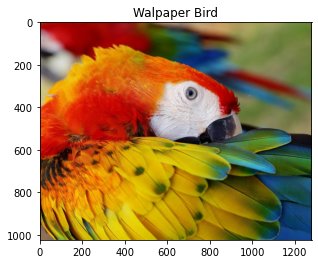

In [8]:
plt.imshow(image_array)
plt.title("Walpaper Bird")
plt.show()

### 3 - Pour créer une image en mode RGB, il faut créer un vecteur de 3 dimensions dont la première dimension est la hauteur, la seconde est la largeur et la troisième représente les canaux RGB (chaque canal est représenté par une valeur de type numpy uint8).


#### <p style= color:blue>(a) Créer un vecteur numpy de taille (100, 300, 3) dont les trois canaux ont tous la valeur 0 pour tous les pixels (ce qui représente une image en noir),</p>


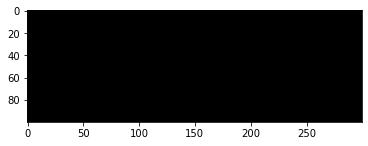

In [9]:
hauteur = 100
largeur = 300
# mode 
canal = 3
my_array_RGB = np.zeros([hauteur, largeur, canal], dtype = np.uint8)
plt.imshow( my_array_RGB )
plt.show()

#### <p style= color:blue>(b) Création d'une image en nuance de gris (mode L : un seul canal),</p>


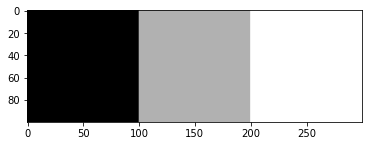

In [10]:
hauteur = 100
largeur = 300
# mode L
grayscale_array = np.zeros([hauteur, largeur], dtype=np.uint8)
# Noir
#grayscale_array[:,:100] = 0
# Gris
grayscale_array[:,100:200] = 150
# Blanc
grayscale_array[:,200:] = 255
plt.imshow(grayscale_array, cmap = 'Greys_r')
plt.show()

#### <p style= color:blue>(c) Testons l’enregistrement d’un vecteur Numpy sous forme d’image</p>


`On peut créer une image PIL à partir d’un vecteur numpy en utilisant Image.fromarray() (Si le type de données du vecteur numpy n’est pas un entier une erreur se produira, il est donc nécessaire de le convertir en utilisant np.uint8()) :`

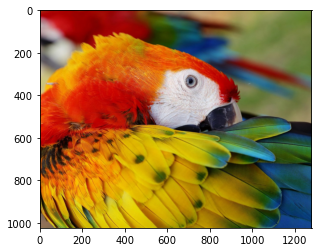

In [70]:
image_from_array = Image.fromarray( np.uint8( image_array ) )
plt.imshow(image_from_array)
plt.show()

On peut enregistrer la nouvelle image avec la fonction save().

In [12]:
image_from_array.save("images/bird_from_array.png")

### 4. Les couleurs dans une image inversée sont les couleurs négatives des originales :
##### <p style= color:green>générer l’image inversée en soustrayant la valeur du pixel de la valeur maximale (255).</p>


On crée une copie de notre array numpy, on pouvez aussi lire une nouvelle image pour faire le teste.

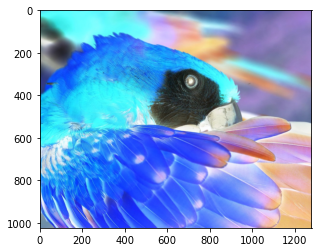

In [13]:
image_array_inver = image_array.copy()
image_array_inver = 255 - image_array_inver
plt.imshow(image_array_inver)
plt.show()

### 5. Pour diviser l’image en composantes de couleur distinctes et générer des images monochromes (un seul canal), il suffit de garder un seul canal (Rouge, Vert ou bleu) et mettre les deux autres valeurs à 0.
##### <p style= color:green>Lire une image RGB et générer les images monochromes en résultants</p>

**Si on décide de garder uniquement le canal rouge**

In [14]:
#on va lire une image
image_groot = Image.open("images/groot1.jpg")

In [15]:
#on transforme image_groot en array numpy
groot_array = np.array(image_groot)

In [16]:

print( 'classe :', type(groot_array) )
print( 'type :', groot_array.dtype )
print( 'taille :', groot_array.shape )
print( 'modifiable :', groot_array.flags.writeable )

classe : <class 'numpy.ndarray'>
type : uint8
taille : (1080, 1920, 3)
modifiable : True


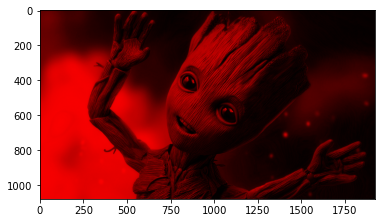

In [17]:
groot_array[:,:,(1,2)] = 0
plt.imshow(groot_array)
plt.show()

On peut aussi décider de garder uniquement le canal vert ou bien le canal bleu uniquement.<br>
Dans ce cas, on aura les figures suivantes

In [18]:
#on transforme image_groot en array numpy
groot_array = np.array(image_groot)

In [19]:
# vert
groot_green = groot_array.copy()
groot_green[:,:,(0,2)] = 0
# Bleu
groot_blue = groot_array.copy()
groot_blue[:,:,(0,1)] = 0

La méthode np.concatenate() permet d'afficher les images l'une à coté de l'autre

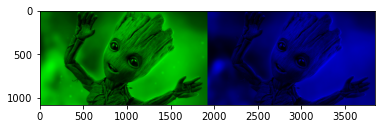

In [20]:
array_GreenBlue = np.concatenate(( groot_green, groot_blue), axis=1)
plt.imshow(array_GreenBlue)
plt.show()

### 6. Operateurs statistiques

### <p style= color:blue>(a) Lire une image le convertir en gris et puis<br> afficher dans une même fenêtre l’image couleur,l’image en gris et l’histrogramme de l’image.
</p>

In [29]:
L = groot_array.shape[0]
H = groot_array.shape[1]
# Créer un vecteur numpy de taille (L, H)
array_grey = np.zeros((L,H))
# Moyenne pondérée
for i in range(L):
    for j in range(H):
        array_grey[i,j] = ( 0.3*groot_array[i,j,0] + 0.5*groot_array[i,j,1] + 0.2*groot_array[i,j,2] )
#plt.imshow(array_grey, cmap = 'Greys_r')


(array([1.54799821e-03, 2.50296572e-03, 3.14194156e-03, 4.99046439e-03,
        5.23345306e-03, 5.77278606e-03, 7.42559546e-03, 7.22247152e-03,
        6.73725423e-03, 7.99502652e-03, 7.19313351e-03, 5.76039721e-03,
        5.22866473e-03, 3.94299852e-03, 1.86729611e-03, 1.12632127e-03,
        6.70175979e-04, 2.41620577e-04, 1.88226914e-04, 1.34149204e-05]),
 array([  0.  ,  12.69,  25.38,  38.07,  50.76,  63.45,  76.14,  88.83,
        101.52, 114.21, 126.9 , 139.59, 152.28, 164.97, 177.66, 190.35,
        203.04, 215.73, 228.42, 241.11, 253.8 ]),
 <BarContainer object of 20 artists>)

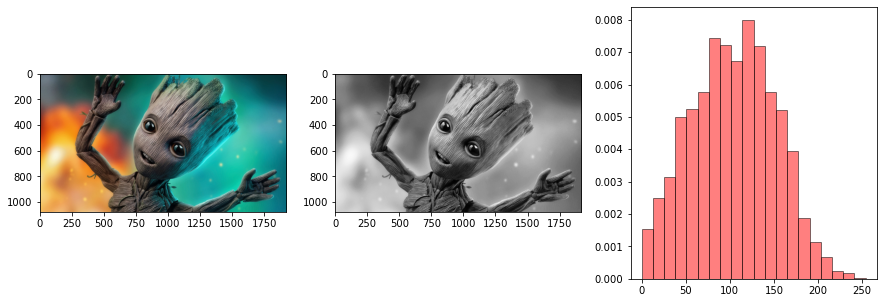

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].imshow(groot_array)
axs[1].imshow(array_grey, cmap = 'Greys_r')
plt.hist(array_grey.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')


### <p style= color:blue>(b) Allonger l’histogramme et puis dans une même fenêtre, afficher l’image originale et son histogramme et l’image ajustée et son histogramme.</p>

**Affichage de l'image originale et de son histogramme**

(array([0.00486486, 0.00595481, 0.00518811, 0.00460833, 0.00547132,
        0.00582107, 0.00568382, 0.00465899, 0.00535609, 0.0043631 ,
        0.00384046, 0.00372022, 0.00516363, 0.00424742, 0.00258698,
        0.00173288, 0.00106745, 0.00113478, 0.0017768 , 0.00119026]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

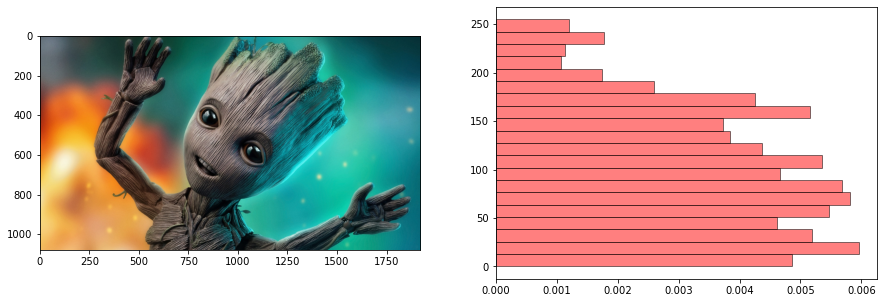

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(groot_array, cmap = 'Greys_r')
plt.hist(groot_array.flatten(), bins = 20, density = True,orientation='horizontal' , alpha = .5 , edgecolor = 'black', color = 'red')


**Affichage de l'image grayscale et de son histogramme**

(array([1.54799821e-03, 2.50296572e-03, 3.14194156e-03, 4.99046439e-03,
        5.23345306e-03, 5.77278606e-03, 7.42559546e-03, 7.22247152e-03,
        6.73725423e-03, 7.99502652e-03, 7.19313351e-03, 5.76039721e-03,
        5.22866473e-03, 3.94299852e-03, 1.86729611e-03, 1.12632127e-03,
        6.70175979e-04, 2.41620577e-04, 1.88226914e-04, 1.34149204e-05]),
 array([  0.  ,  12.69,  25.38,  38.07,  50.76,  63.45,  76.14,  88.83,
        101.52, 114.21, 126.9 , 139.59, 152.28, 164.97, 177.66, 190.35,
        203.04, 215.73, 228.42, 241.11, 253.8 ]),
 <BarContainer object of 20 artists>)

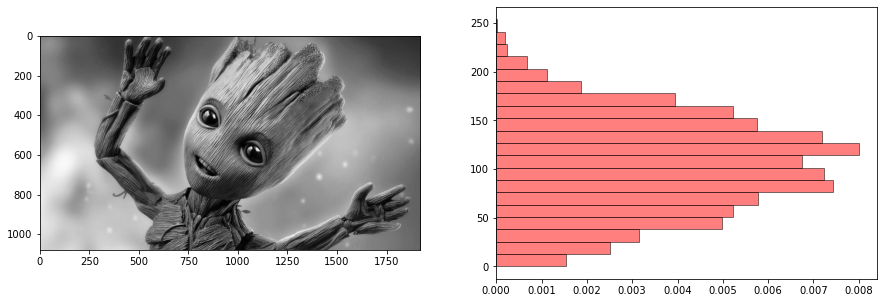

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(array_grey, cmap = 'Greys_r')
plt.hist(array_grey.flatten(), bins = 20, density = True,orientation='horizontal' , alpha = .5 , edgecolor = 'black', color = 'red')

### <p style= color:blue>(c) Faite une égalisation d’histogramme et puis dans une même fenêtre, afficher l’image originale et son histogramme et l’image après égalisation et son histogramme.


In [43]:
#load file as pillow Image 
img = Image.open("images/groot1.jpg")

# convert to grayscale
imgray = img.convert(mode='L')

#convert to NumPy array
array_grey = np.asarray(imgray)

"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(array_grey.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)


"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(array_grey.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), array_grey.shape)


In [45]:
######################################
# WRITE EQUALIZED IMAGE TO FILE
######################################
#convert NumPy array to pillow Image and write to file
eq_img = Image.fromarray(eq_img_array, mode='L')
eq_img.save("images/eq_im_groot.jpg")

In [46]:
test = Image.open("images/eq_im_groot.jpg")

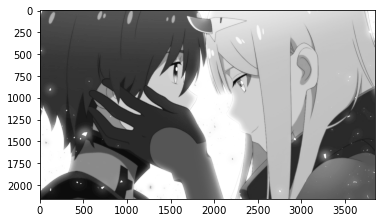

In [93]:
plt.imshow(test,cmap = 'Greys_r')
plt.show()

### 7. Lire une image, filtrer l’image et comparer l’histogramme de l’image initiale et de l’image filtrée

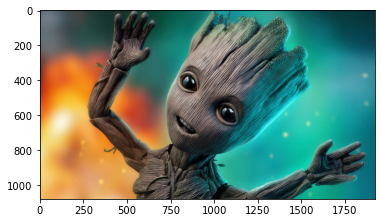

In [48]:
groot = Image.open("images/groot1.jpg")
plt.imshow(groot)
plt.show()

In [49]:
array_groot = np.array(groot)

**Appliquons un filtre BLUR à notre image groot**

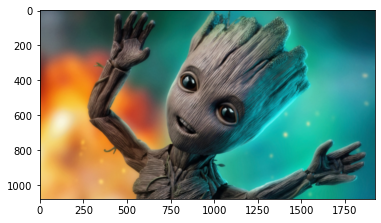

In [52]:
from PIL import ImageFilter
img = Image.fromarray( np.uint8( array_groot ))
img_BLUR = img.filter( ImageFilter.BLUR)
plt.imshow(img_BLUR)
plt.show()

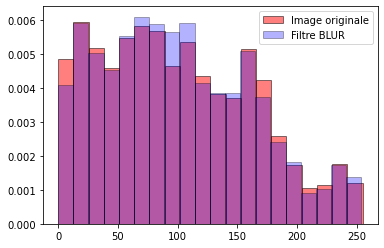

In [54]:
plt.hist(array_groot.flatten(), bins=20, density=True , alpha=.5 , edgecolor='black', color='red' , label = 'Image originale')
plt.hist( np.array(img_BLUR).flatten(), bins=20, density=True , alpha=.3 , edgecolor='black', color='blue', label = 'Filtre BLUR')
plt.legend()
plt.show()

## EXERCICE 2 : ScikitLearn

Scikit-image est une bibliothèque open source destinée à la recherche, à l’éducation et aux applications industrielles.<br> Elle dispose de nombreux algorithmes de segmentation, de manipulation des couleurs, de filtrage, etc....



### 1. Verifier la version Scikit-image avec la syntaxe suivante

In [55]:
import skimage
skimage.__version__

'0.17.2'

### 2. Pour charger une image, il faut importer le module io et utiliser la fonction imread() en lui passant le chemin vers le fichier

### <p style= color:blue>(a) Lire une image,</p>

In [56]:
from skimage import io

In [68]:
darling = io.imread("images/darling.jpg")

### <p style= color:blue>(b) Extraire des informations basiques comme le type, le mode et la taille.</p>


In [61]:
print("La taille de l'image: ",darling.size)

La taille de l'image:  24883200


In [62]:
print("La shape de l'image: ",darling.shape)

La shape de l'image:  (2160, 3840, 3)


In [65]:
print("Le type de l'image est : ", type(darling))

Le type de l'image est :  <class 'numpy.ndarray'>


### <p style= color:blue>(c) Afficher l’image puis enregistrer l’image à l’aide de la fonction io.imsave.</p>


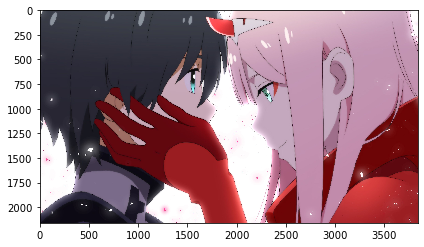

In [69]:
io.imshow(darling)
io.show()

### 3. Faire des transformations sur l’image et comparer les résultats obtenus à l’aide de l’historamme.


In [91]:
#load file as pillow Image 
img = Image.open("images/darling.jpg")

# convert to grayscale
darling_gray = img.convert(mode='L')

#convert to NumPy array
darling_array = np.asarray(darling_gray)

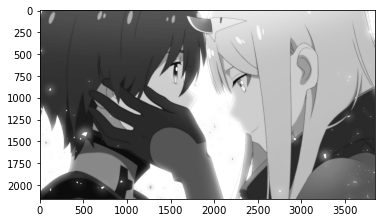

In [92]:
plt.imshow(darling_array, cmap = 'Greys_r')

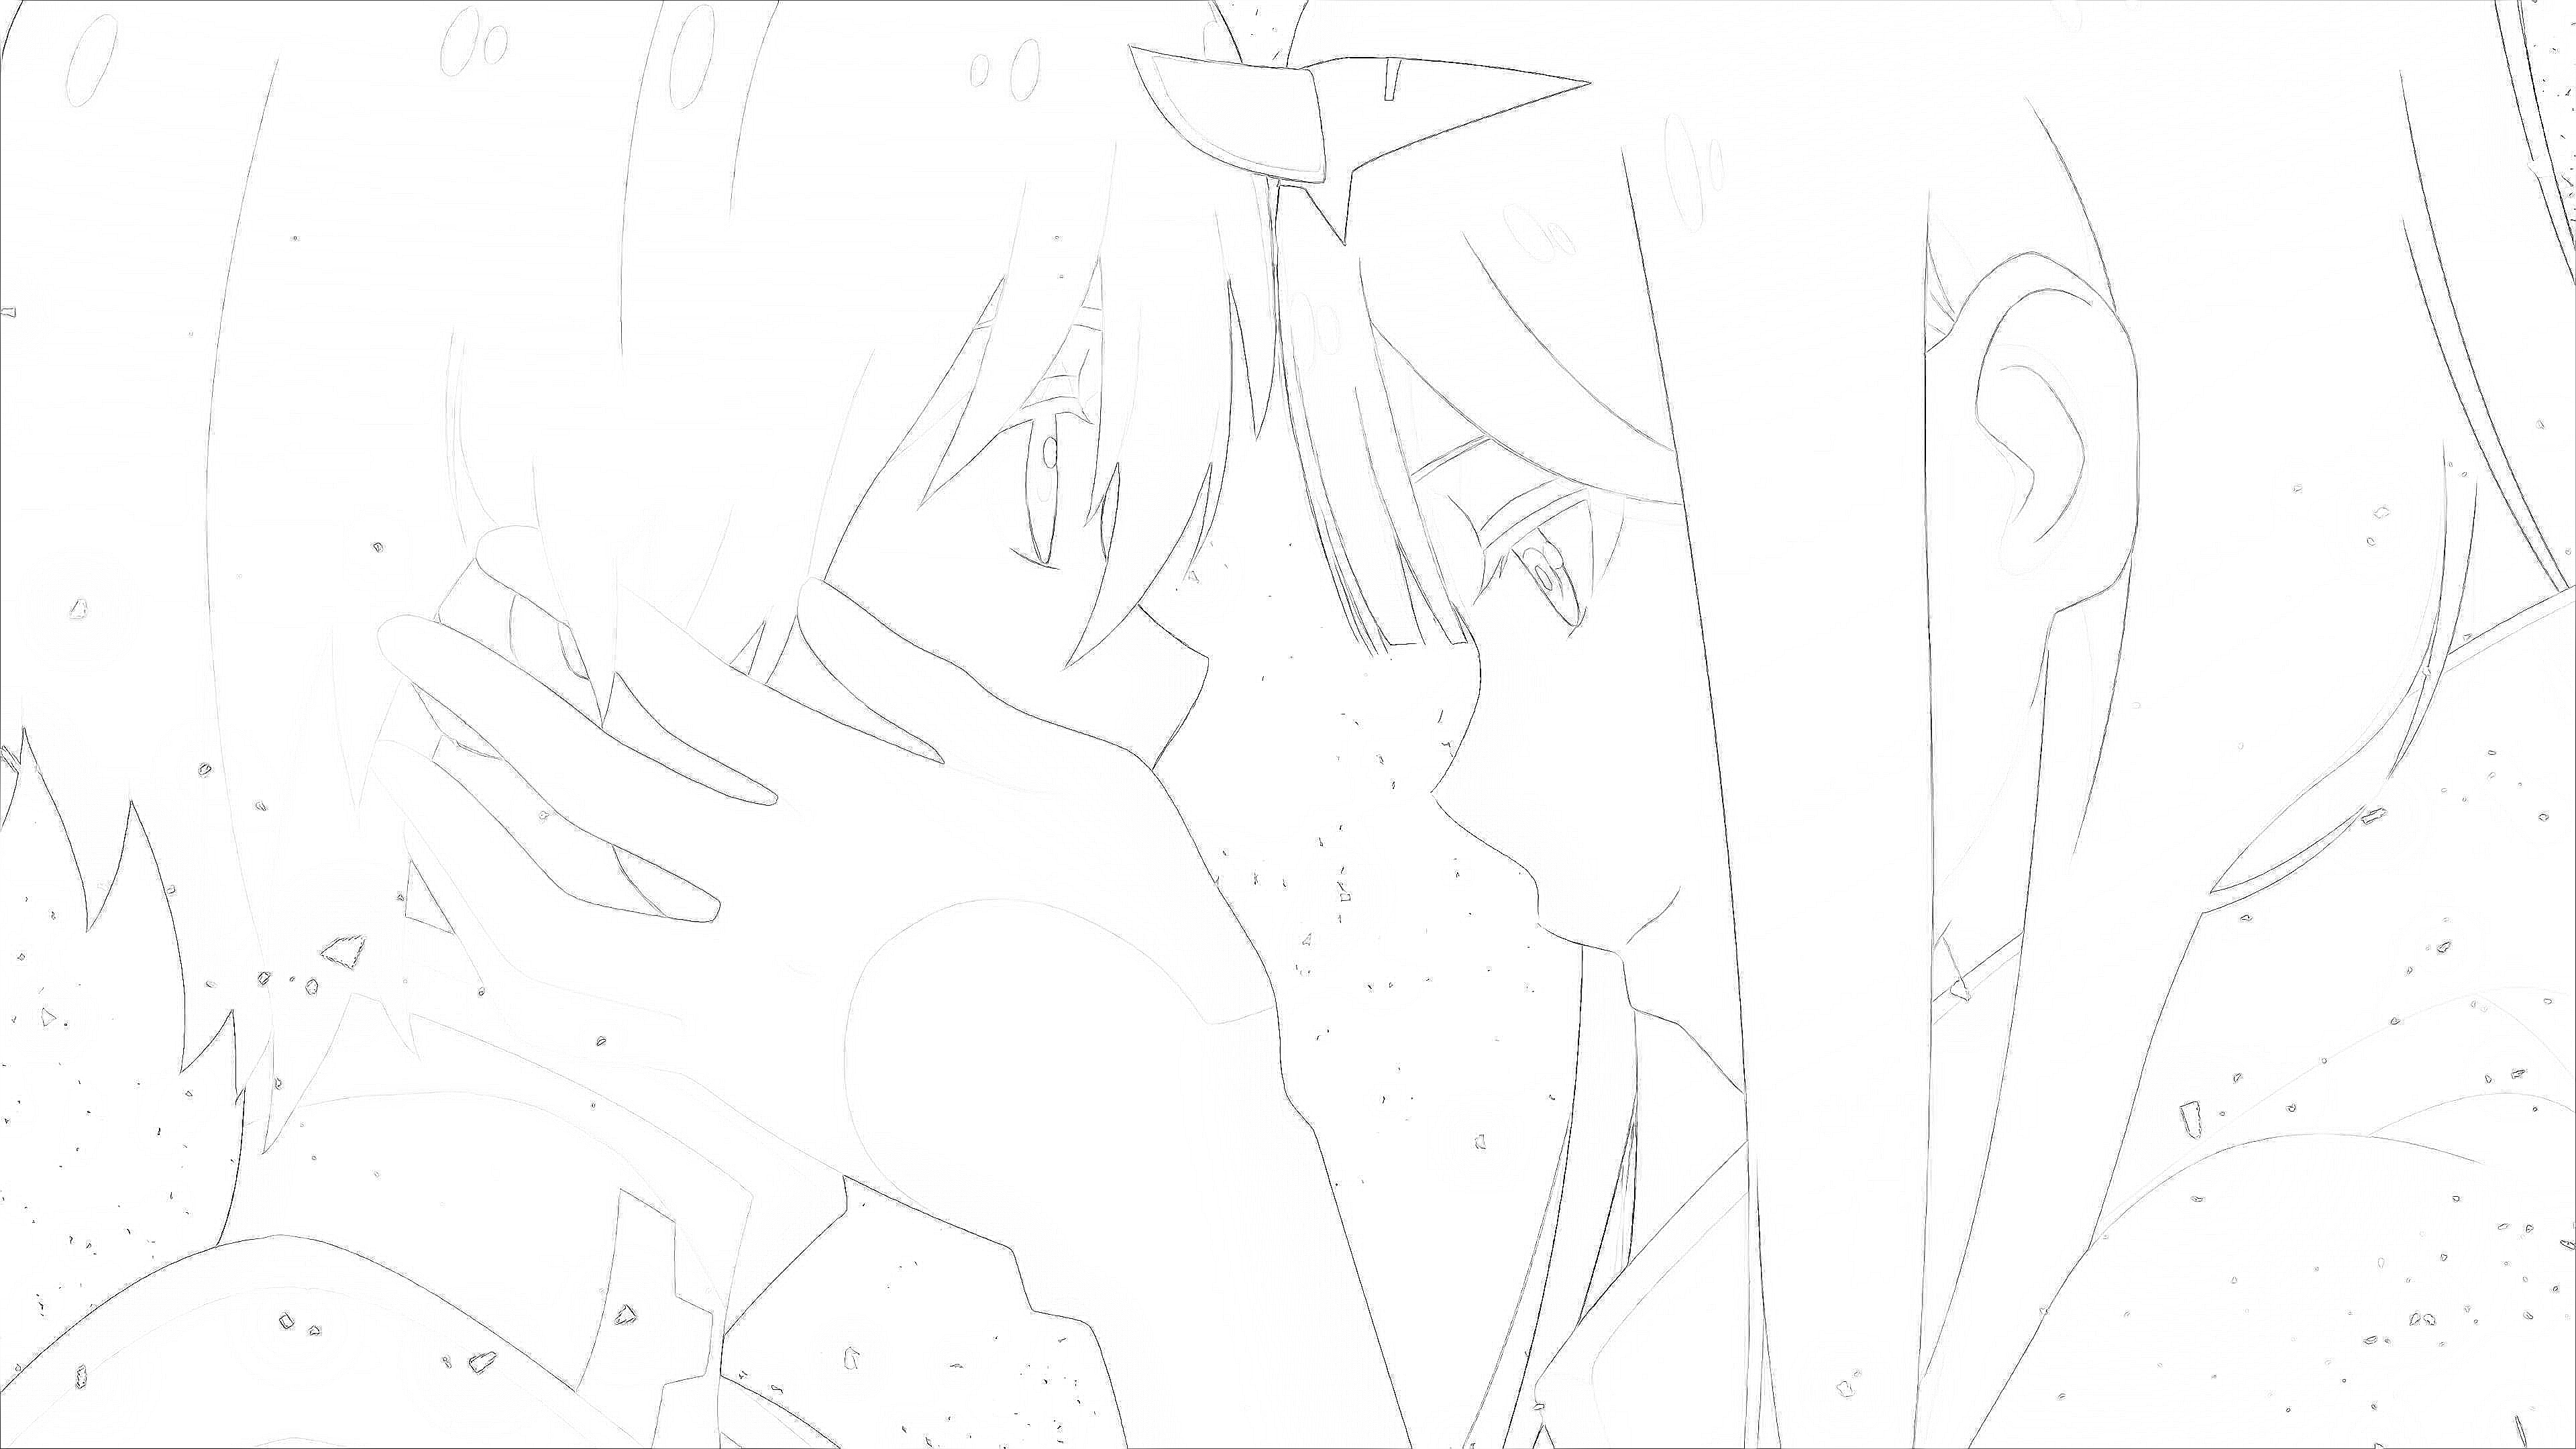

In [105]:
img = Image.fromarray( np.uint8( darling_array ))
img_COUNTOUR = img.filter( ImageFilter.CONTOUR )
img_COUNTOUR

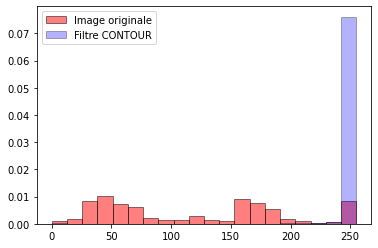

In [106]:
plt.hist(darling_array.flatten(), bins=20, density=True , alpha=.5 , edgecolor='black', color='red' , label = 'Image originale')
plt.hist( np.array(img_COUNTOUR).flatten(), bins=20, density=True , alpha=.3 , edgecolor='black', color='blue', label = 'Filtre CONTOUR')
plt.legend()
plt.show()

L'histogramme montre la supperposiion de deux images.<br>L'image originale a été transformé en grayscale puis on a appliqué le filtre de détection des contours.<br>L'histograme a été généré à la suite de ces deux transformations successives.

### 4. Tester la conversion d’espace de couleurs avec le sous module color : ’RGB’, ’HSV’, ’CIE’, ’XYZ’, ’YUV’, ’YIQ’, ’YPbPr’......

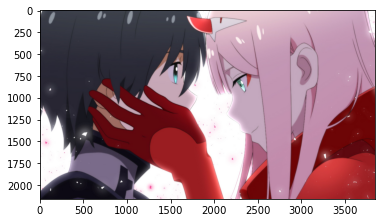

In [109]:
# convertir une image
from skimage import io, color
darling = io.imread("images/darling.jpg")
plt.imshow(darling)

**RGB to HSV**

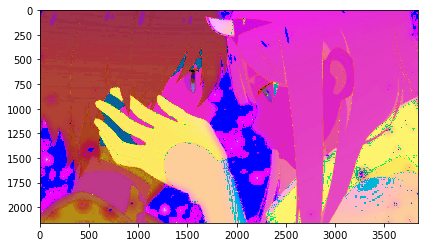

In [112]:
color_RGB_to_HSV = color.rgb2hsv(darling)
io.imshow(color_RGB_to_HSV)
io.show()

**RGB to Ypbpr**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


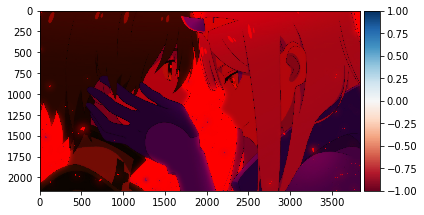

In [113]:
color_RGB_to_Ypbpr = color.rgb2ypbpr(darling)
io.imshow(color_RGB_to_Ypbpr)
io.show()


**RGB to XYZ**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


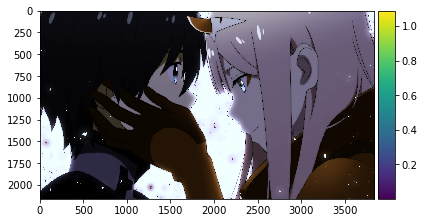

In [115]:
color_RGB_to_XYZ = color.rgb2xyz(darling)
io.imshow(color_RGB_to_XYZ)
io.show()

### 5. Générer des images monochromes,

In [116]:
darling_array = np.array(darling)

In [117]:
darling_RED = darling_array.copy()
darling_RED[:,:,(1,2)] = 0
# vert
darling_GREEN = darling_array.copy()
darling_GREEN[:,:,(0,2)] = 0
# Bleu
darling_BLUE = darling_array.copy()
darling_BLUE[:,:,(0,1)] = 0



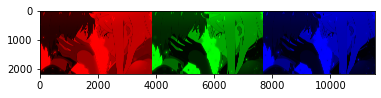

In [118]:
array_RGB = np.concatenate((darling_RED, darling_GREEN, darling_BLUE), axis=1)
plt.imshow(array_RGB)
plt.show()

### 6. Tester plusieurs fonctions du module feature pour la détection de points d’intérêts, de contours et de régions.


### 7. A l’aide de skimage.filters


### <p style= color:blue>(a) Lire une image et le convertir l’image en gris.</p>


In [126]:
from PIL import Image 
col = Image.open("images/groot1.jpg") #read image 
gray_groot = col.convert('L')  #conversion to gray scale 

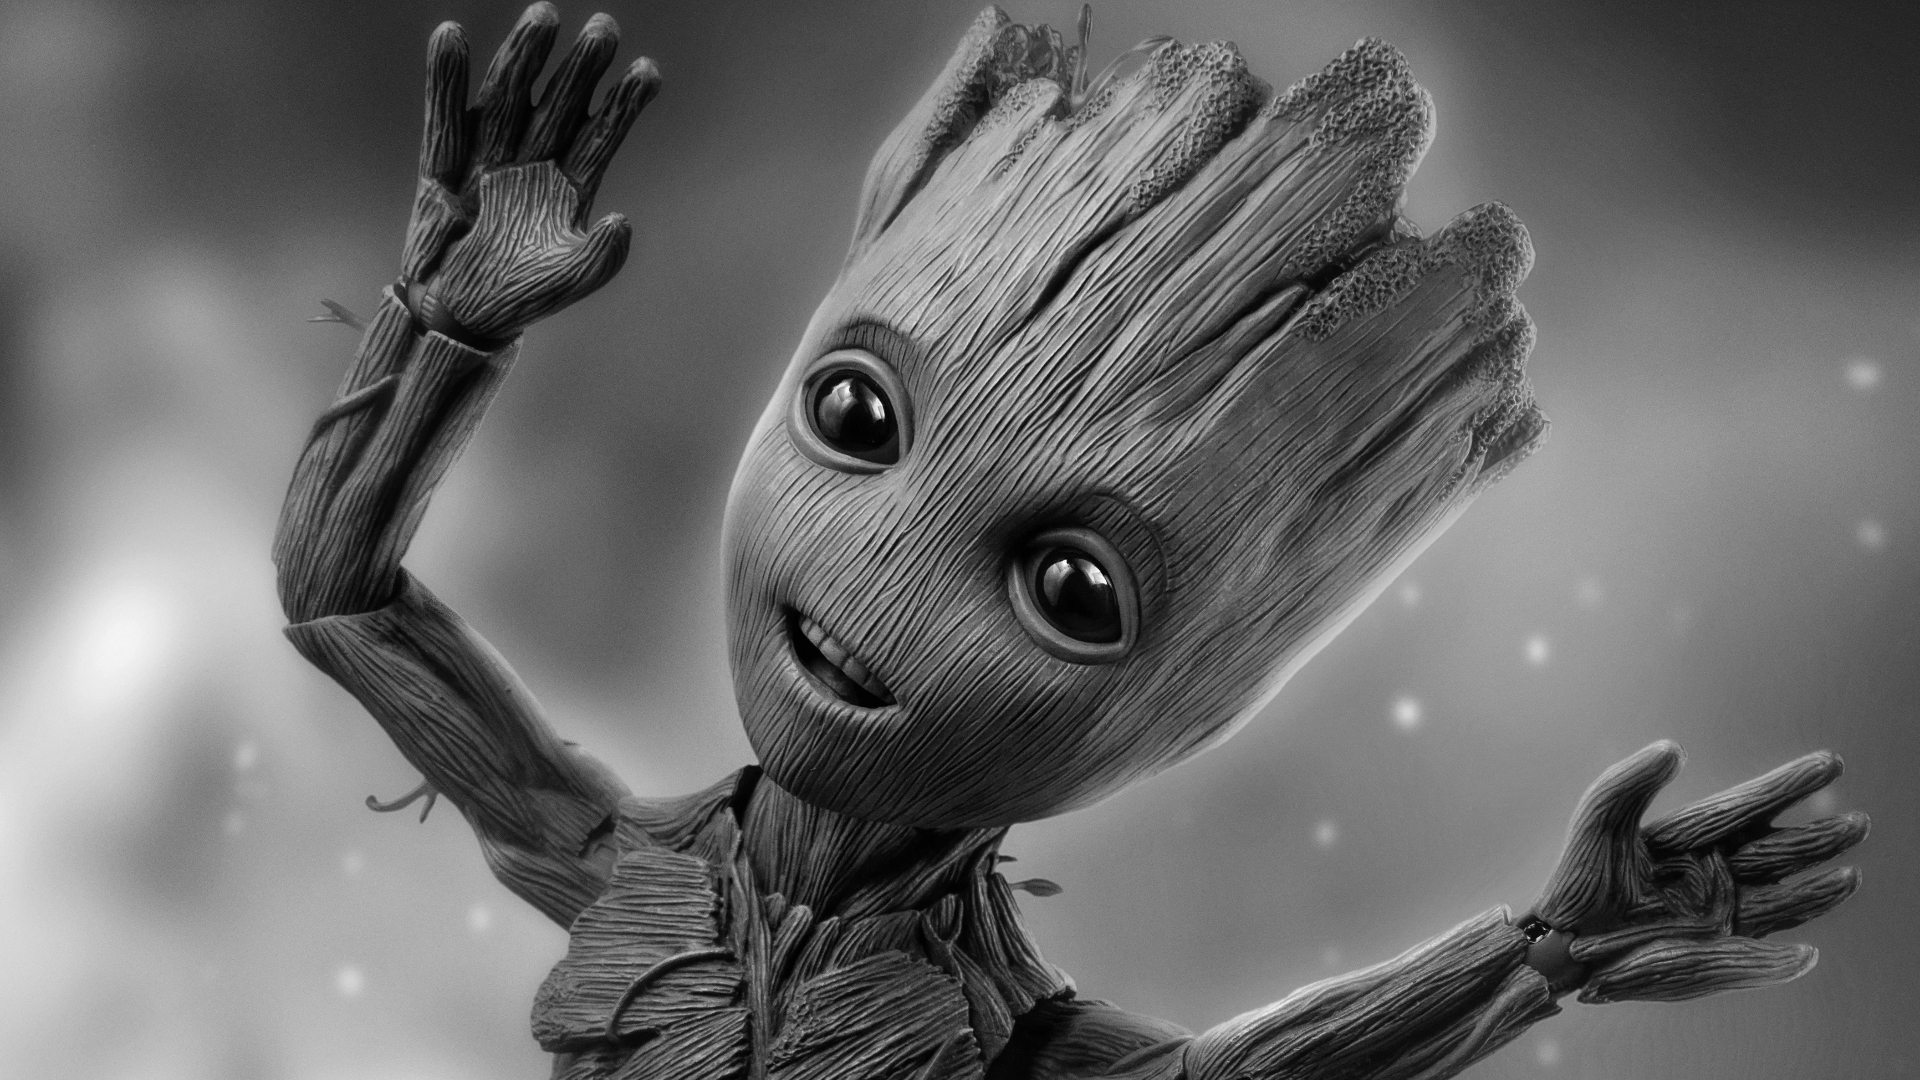

In [127]:
gray_groot

In [129]:
groo_gray_array = np.array(gray_groot)

#### <p style= color:green>i. faire un seuillage avec un seul seuil et ensuite afficher le résultat obtenu en faisant varier le  seuil.</p>


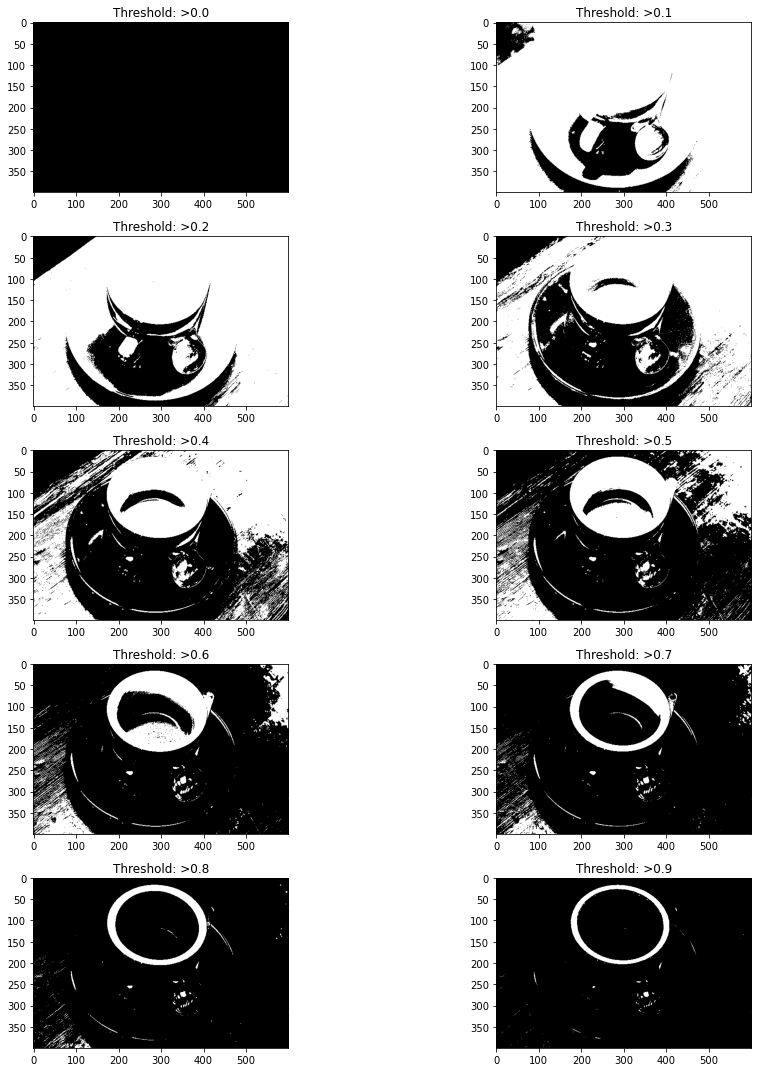

In [137]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
  
# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)
# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))
  
for i in range(10):
    
  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)
    
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
    
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')
    
plt.tight_layout()

## EXERCICE 3 : Scipy
Scipy est une bibliothèque scientifique de Python construite sur la base de
Numpy et facile à utiliser. Elle contient plusieurs fonctions mathématiques
et scientifiques très performantes.


### 1. Importez scipy, matplotlib.pyplot (pour afficher les images), la bibliothèque numpy (pour manipuler les images) et skimage pour importer notre image de test et la transformer en nuances de gris.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from scipy import ndimage

### 2. Ouvrir un fichier image, afficher les caractéristiques de l’image et ensuite afficher l’image.


In [2]:
im = io.imread("images/eagle.jpg")

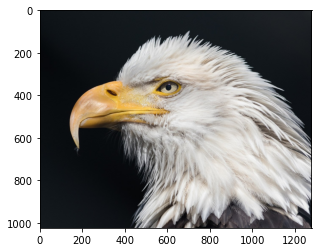

In [3]:
plt.imshow(im)
plt.show()

In [7]:
# informations
print( 'classe :', type(im))
print( 'type :', im.dtype )
print( 'taille :', im.shape)

classe : <class 'numpy.ndarray'>
type : uint8
taille : (1024, 1280, 3)


### 3. Après avoir importer les modules

In [14]:
#eagle_grey = color.rgb2grey(im)
#plt.imshow(eagle_grey, cmap = 'Greys_r')
#plt.show()

### <p style= color:blue>(a) Ajouter du bruit aléatoire à une image test.</p>

In [11]:
from skimage.util import random_noise

In [12]:
# Add salt-and-pepper noise to the image.
noise_img = random_noise(im, mode='s&p',amount=0.3)
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')

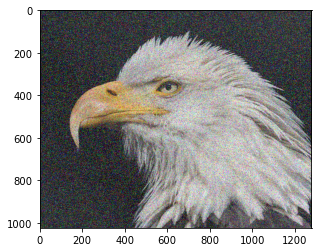

In [19]:
plt.imshow(noise_img)
plt.show()

### <p style= color:blue>(b) Comparer les histogrammes des deux images (image test et image bruitée </p>

 **affichage de l'image original et l'histogramme de distribution des pixels qui est associé**

(array([0.00671012, 0.02103   , 0.00907216, 0.00095053, 0.0010879 ,
        0.00106173, 0.00097064, 0.00090081, 0.00099912, 0.00112714,
        0.00128507, 0.0014226 , 0.00213603, 0.00300841, 0.00412689,
        0.00508888, 0.00717231, 0.0071106 , 0.00300796, 0.00016248]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

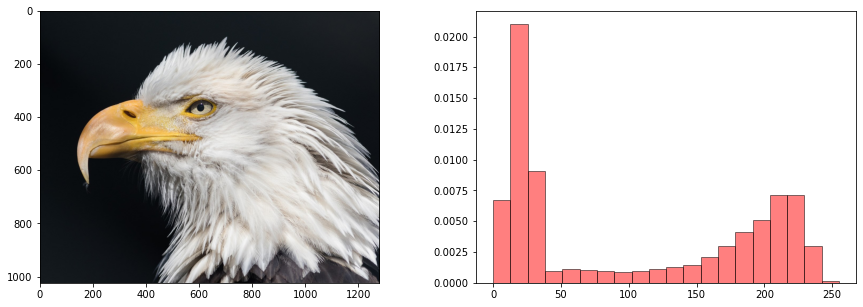

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(im)
plt.hist(im.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'red')


 **affichage de l'image avec le bruit et l'histogramme de distribution des pixels qui est associé**

(array([0.0164626 , 0.01473032, 0.00635077, 0.00066634, 0.00075939,
        0.00074224, 0.00073533, 0.00057822, 0.00070272, 0.00079178,
        0.00089791, 0.00099938, 0.00148988, 0.00210643, 0.00288156,
        0.00356354, 0.00501226, 0.0049769 , 0.00210613, 0.01187768]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

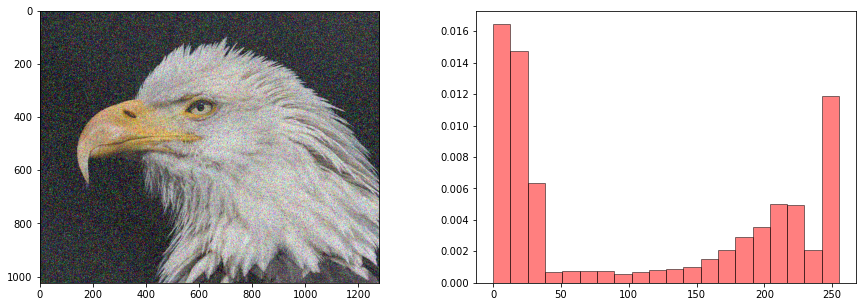

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(noise_img)
plt.hist(noise_img.flatten(), bins = 20, density = True, alpha = .5 , edgecolor = 'black', color = 'red')


**Superposition des deux histogrammes**

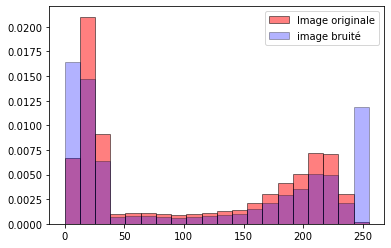

In [20]:
plt.hist(im.flatten(), bins=20, density=True , alpha=.5 , edgecolor='black', color='red' , label = 'Image originale')
plt.hist( np.array(noise_img).flatten(), bins=20, density=True , alpha=.3 , edgecolor='black', color='blue', label = 'image bruité')
plt.legend()
plt.show()

### <p style= color:blue>(c) Appliquer le filtre gaussien à l’image pour voir comment le filtre réduit le bruit et comparer les histogrammes de l’image filtrée et de l’image test. </p>

In [23]:
import cv2

In [27]:
# Generate Gaussian noise
gauss = np.random.normal(0,1,im.size)
gauss = gauss.reshape(im.shape[0],im.shape[1],im.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(im,gauss)

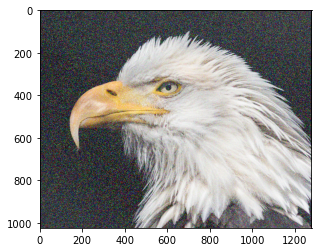

In [29]:
plt.imshow(img_gauss)
plt.show()

### <p style= color:blue>(d) Le bruit poivre et sel est une modification que subit une image numérique en faisant passer l’intensité de certains pixels à la valeur minimale 0 (couleur noire) ou maximale 255 (couleur blanche). </p>

#### <p style= color:green>i. Générer une image avec un bruit poivre et sel à partir de votre image de test,</p>

In [30]:
import random
import cv2
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

In [41]:
from PIL import Image

In [62]:
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('images/eagle.jpg',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('images/salt-and-pepper-eagle.jpg',
            add_noise(img))

True

In [63]:
salt_and_pepper_eagle = Image.open('images/salt-and-pepper-eagle.jpg')

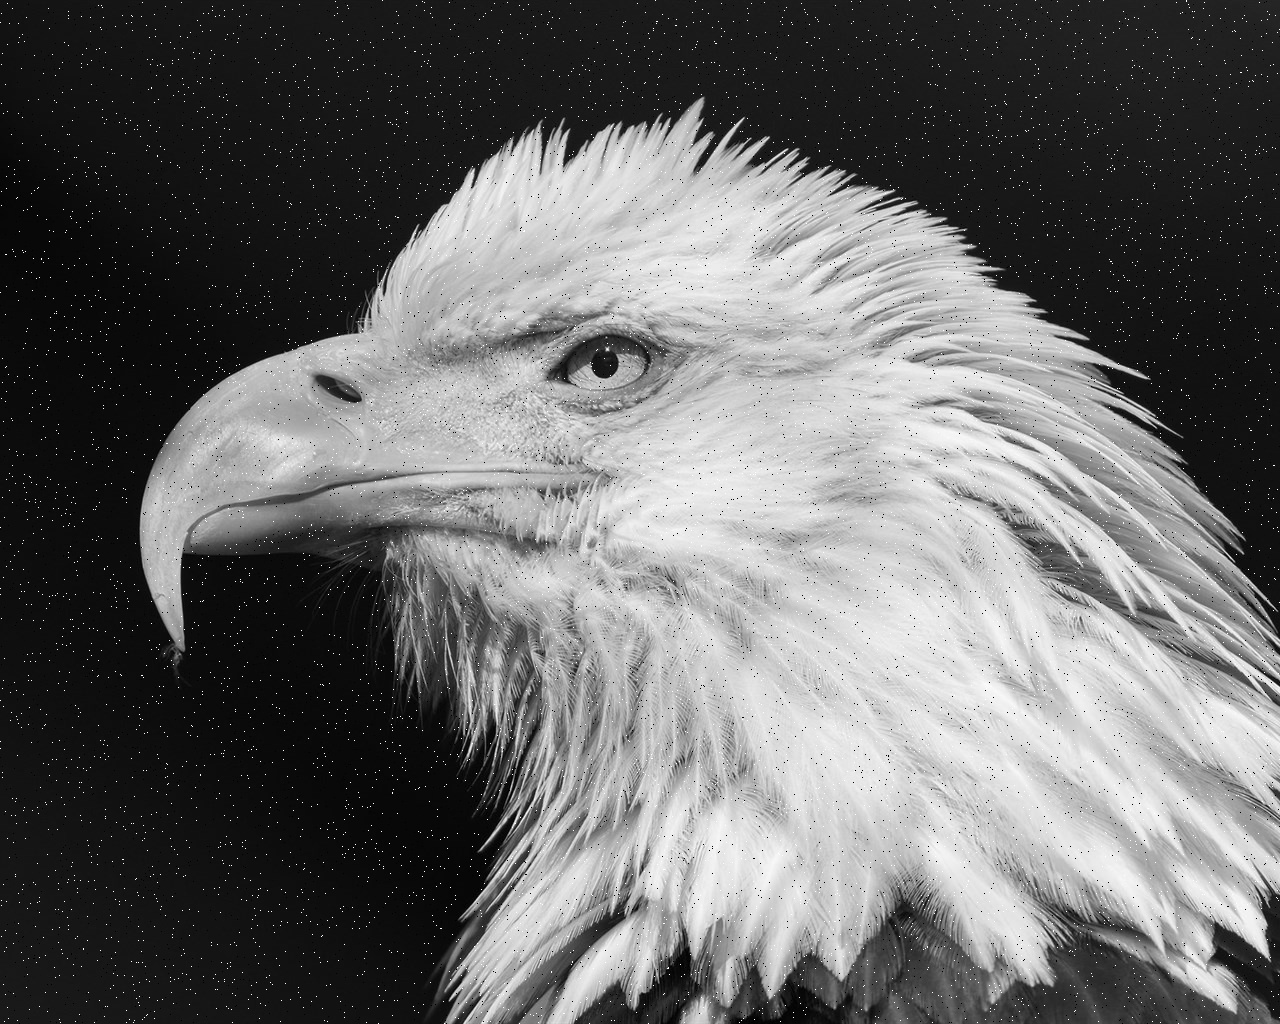

In [66]:
salt_and_pepper_eagle

On peut nettement appercevoir les grains (salt and pepper) qui sont au niveau de notre image.

#### <p style= color:green>ii. Afficher les deux images (originale et bruitée) et générer leurs histogrammes de pixels</p>

**Image avec bruit salt and pepper**

In [68]:
salt_and_pepper_eagle_array = np.array(salt_and_pepper_eagle)

(array([0.00853092, 0.0214967 , 0.00666384, 0.00090847, 0.00098386,
        0.00095765, 0.0008351 , 0.00075594, 0.00083804, 0.00102186,
        0.00122723, 0.00138478, 0.00214287, 0.0032056 , 0.00463987,
        0.00539138, 0.00704549, 0.00696674, 0.00285465, 0.00058037]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

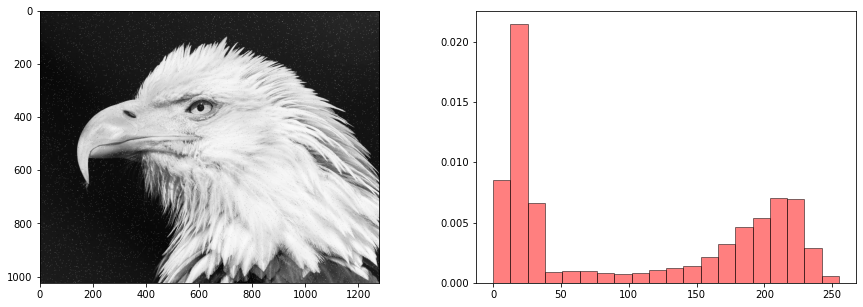

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(salt_and_pepper_eagle_array, cmap = 'Greys_r')
plt.hist(salt_and_pepper_eagle_array.flatten(), bins = 20, density = True, alpha = .5 , edgecolor = 'black', color = 'red')


**Image originale**

(array([0.00671012, 0.02103   , 0.00907216, 0.00095053, 0.0010879 ,
        0.00106173, 0.00097064, 0.00090081, 0.00099912, 0.00112714,
        0.00128507, 0.0014226 , 0.00213603, 0.00300841, 0.00412689,
        0.00508888, 0.00717231, 0.0071106 , 0.00300796, 0.00016248]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <BarContainer object of 20 artists>)

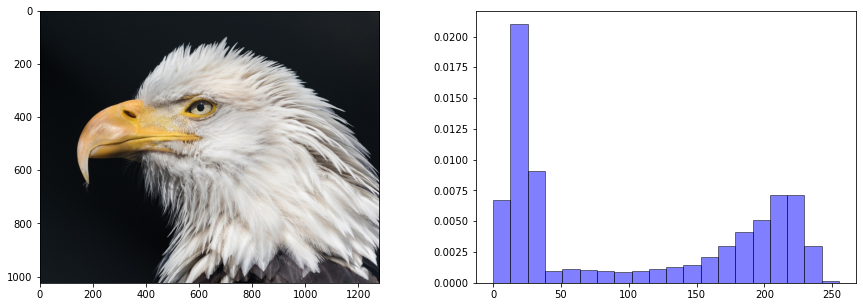

In [74]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].imshow(im)
plt.hist(im.flatten(), bins = 20, density = True , alpha = .5 , edgecolor = 'black', color = 'blue')


#### <p style= color:green>iii. Appliquer le filtre médian à l’image avec le bruit poivre et sel pour voir comment le filtre réduit le bruit</p>

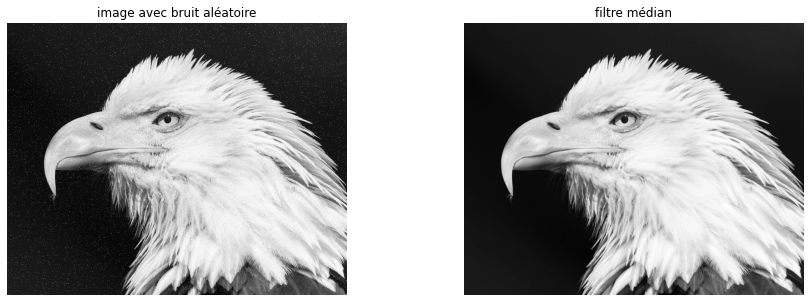

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
# image avec bruit poivre et sel
axs[0].imshow( salt_and_pepper_eagle, cmap = 'Greys_r')
axs[0].set_title( 'image avec bruit aléatoire' )
axs[0].set_axis_off()
# image bruitée avec filtre médian
median_image = ndimage.median_filter( salt_and_pepper_eagle , 3)
axs[1].imshow( median_image, cmap = 'Greys_r')
axs[1].set_title( 'filtre médian' )
axs[1].set_axis_off()

### 4. Détection de contours

### <p style= color:blue>(a) Tester sur une image la détection de contour en lui donnant les coeeficient d’un masque de convolutions </p>

In [78]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt

In [81]:
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

In [91]:
kernel = np.array([[0,0,0], 
                   [-1,1,0,], 
                   [0,0,0,]])

In [92]:
imgconvol = signal.convolve2d(salt_and_pepper_eagle_array, 
                              kernel_contour, 
                              boundary='symm', 
                              mode='same')


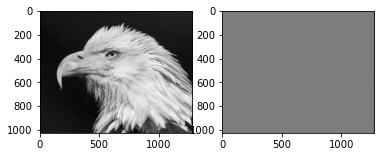

In [94]:
displayTwoBaWImages(salt_and_pepper_eagle_array, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

### <p style= color:blue>(b) tester plusieurs fonctions de détection de contours du module ndimage,
 </p>

**Sobel filter for edge detection**

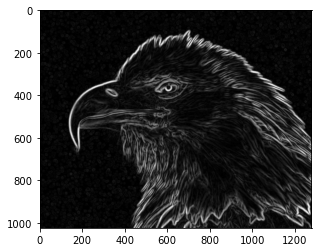

In [95]:
# filtre gaussien pour réduir le bruit
grey_image_gaussian = ndimage.gaussian_filter( salt_and_pepper_eagle_array*255 , 3)
# détecteur de bords sobel
edges_image = grey_image_gaussian.astype('int32')
dx = ndimage.sobel(edges_image, 0)
dy = ndimage.sobel(edges_image, 1)
edges_image = np.hypot(dx, dy)
# affichage
plt.imshow(edges_image, cmap = 'Greys_r')
plt.show()

**Canny filter for edge detection**

In [96]:
from skimage import feature
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(salt_and_pepper_eagle_array)
edges2 = feature.canny(salt_and_pepper_eagle_array, sigma=3)

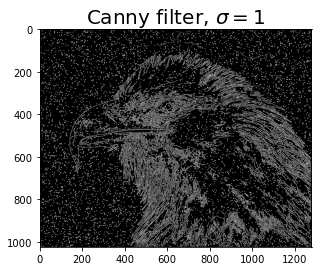

In [100]:
plt.imshow(edges1,  cmap = 'Greys_r')
plt.title(r'Canny filter, $\sigma=1$', fontsize=20)
plt.show()

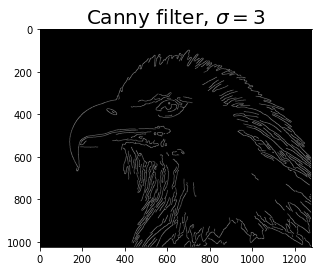

In [101]:
plt.imshow(edges2,  cmap = 'Greys_r')
plt.title(r'Canny filter, $\sigma=3$', fontsize=20)
plt.show()

**Prewitt filter for edge detection**

In [103]:
from skimage import filters
edges3 = filters.prewitt(salt_and_pepper_eagle_array)

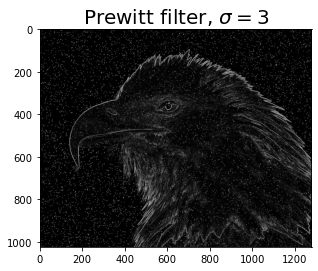

In [104]:
plt.imshow(edges3,  cmap = 'Greys_r')
plt.title(r'Prewitt filter', fontsize=20)
plt.show()

### 5. Tester quelques méthodes de détection de points d’intérêts et de segmentation en région.

segmentation seuil = 50


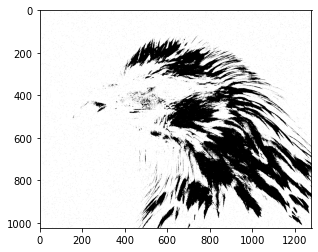

In [106]:
# segmentation
array_seg = salt_and_pepper_eagle_array*255 > 50
# affichage
print('segmentation seuil = 50')
plt.imshow(array_seg, cmap= 'Greys_r')
plt.show()


Le module filters du la bibliothèque skimage contient plusieurs algorithmes qui permettent de choisir le seuil de la segmentation.<br>On va tester tous les algorithmes de seuillage en utilisant la fonction try_all_threshold.<br>
Leur application sur notre image de test génère plusieurs images segmentées :

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


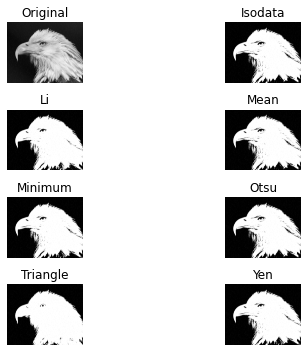

In [107]:
from skimage import filters
filters.try_all_threshold( salt_and_pepper_eagle_array )
io.show()

### 6. Morphologie mathématique

### <p style= color:blue>(a) Créer une image binaire</p>

In [119]:
from PIL import Image 
col = Image.open("images/groot1.jpg") #read image 
gray = col.convert('L')  #conversion to gray scale 
groot_binary = gray.point(lambda x: 0 if x<128 else 255, '1')  #binarization 
groot_binary.save("images/groot_binary.jpg") #save it 

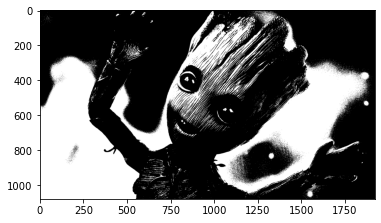

In [118]:
plt.imshow(bw)

### <p style= color:blue>(b) Tester l’érosion binaire avec la fonction binary_erosion() du module ndimage</p>


On peut implémenter l’érosion binaire en utilisant la fonction binary_erosion() du module ndimage :

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


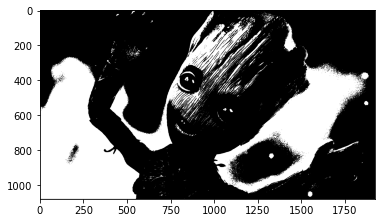

In [120]:
array_erosion = ndimage.binary_erosion( groot_binary )
print( array_erosion*255 )
plt.imshow( array_erosion, cmap = 'Greys_r' )
plt.show()

Lors de ce traitement, On applique un filtre minimum de taille 3x3. On peut changer la taille en utilisant le paramètre structure dans la fonction binary_erosion(). L'opération qui en quelque sorte tente de produire l'inverse de l’érosion est la dilatation morphologique. On peut utiliser la fonction binary_dilation() du module ndimage pour appliquer une dilatation binaire.




### <p style= color:blue>(c) Testons la dilatation binaire avec la fonction binary_dilation() du module ndimage,</p>


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


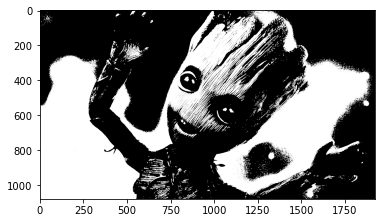

In [121]:
array_dilation = ndimage.binary_dilation( groot_binary )
print( array_dilation * 255 )
plt.imshow( array_dilation, cmap = 'Greys_r' )
plt.show()


### <p style= color:blue> (d) Tester sur l’image test l’ouverture, la fermeture et la squelletisation. </p>
